In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [3]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [4]:
#!sudo pip3 install --upgrade tensorflow

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:
train_images.dtype

dtype('uint8')

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
mapped_labels = dict(zip(range(0, len(class_names)), class_names))
mapped_labels        

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [12]:
import pandas as pd
train_labelsS = pd.Series(train_labels)
new_trainLabels = train_labelsS.map(mapped_labels)

In [13]:
new_trainLabels[:10]

0     Ankle boot
1    T-shirt/top
2    T-shirt/top
3          Dress
4    T-shirt/top
5       Pullover
6        Sneaker
7       Pullover
8         Sandal
9         Sandal
dtype: object

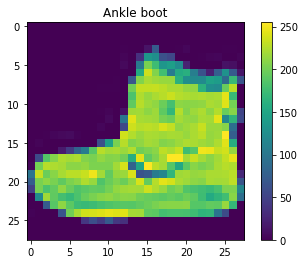

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.title(new_trainLabels[0])
plt.show()

In [15]:
train_images = train_images / 255.0

test_images = test_images / 255.0

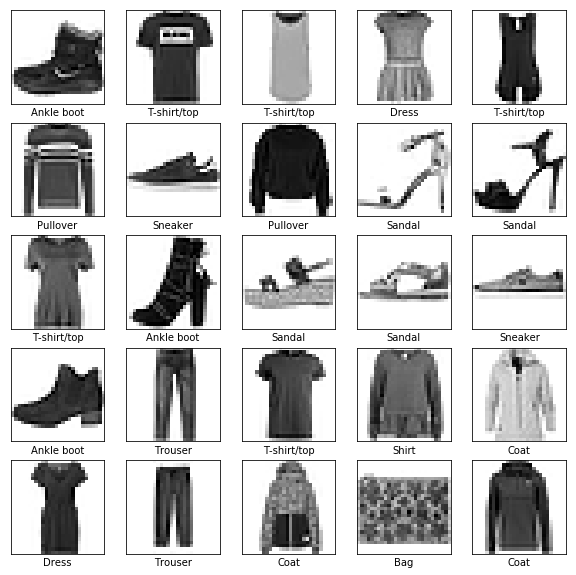

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(new_trainLabels[i])
plt.show()

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.4923 - accuracy: 0.8272
Epoch 2/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3719 - accuracy: 0.8652
Epoch 3/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3349 - accuracy: 0.8775
Epoch 4/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3082 - accuracy: 0.8863
Epoch 5/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2903 - accuracy: 0.8924
Epoch 6/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2779 - accuracy: 0.8967
Epoch 7/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2656 - accuracy: 0.9016
Epoch 8/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2532 - accuracy: 0.9052
Epoch 9/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2443 - accuracy: 0.9080
Epoch 10/10
60

In [20]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest loss    :', test_loss)

10000/10000 - 1s - loss: 0.3395 - accuracy: 0.8813

Test accuracy: 0.8813

Test loss    : 0.3394750957727432


In [21]:
predictions = model.predict(test_images)

In [22]:
predictions[0]

array([6.9538828e-06, 1.9331976e-08, 3.3187316e-08, 1.0323478e-07,
       4.7857441e-07, 2.2981862e-02, 2.8128355e-07, 7.0562646e-02,
       2.6826347e-05, 9.0642089e-01], dtype=float32)

In [23]:
np.argmax(predictions[0])

9

In [24]:
test_labels[0]

9

In [25]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [26]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

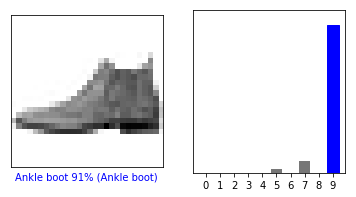

In [27]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

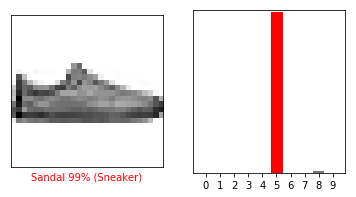

In [39]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

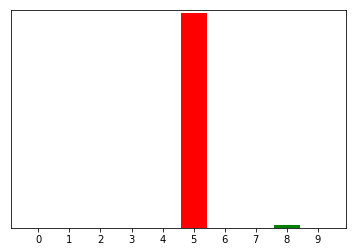

In [45]:
predictions_array, true_label = predictions[i], test_labels[i]
plt.grid(False)
plt.xticks(range(10))
plt.yticks([])
thisplot = plt.bar(range(10), predictions_array, color="#777777")
plt.ylim([0, 1])
predicted_label = np.argmax(predictions_array)

thisplot[predicted_label].set_color('red')
thisplot[true_label].set_color('blue')
thisplot[8].set_color('green')

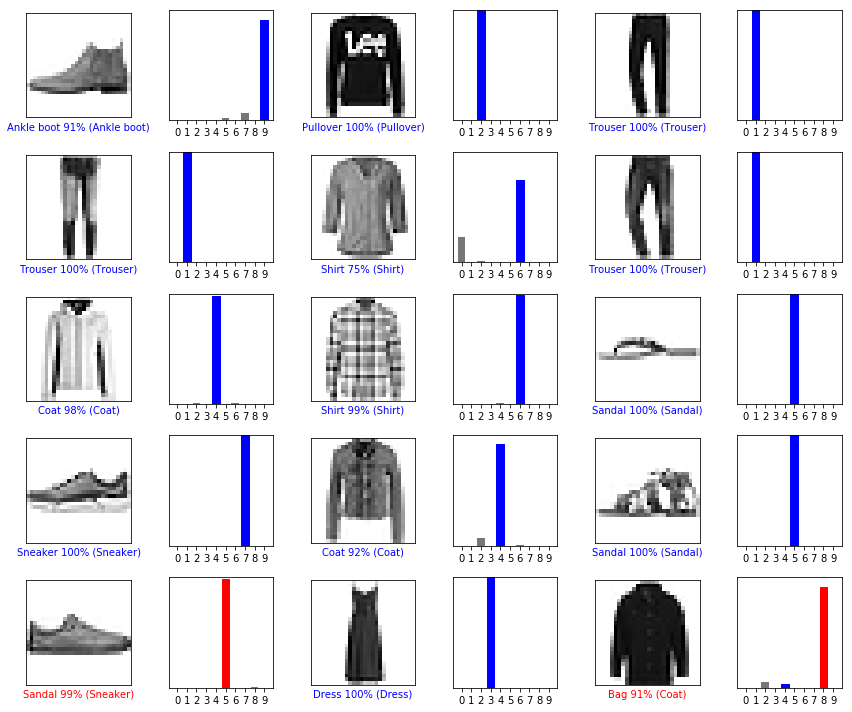

In [48]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [50]:
i=10
# Grab an image from the test dataset.
img = test_images[i]

print(img.shape)

(28, 28)


In [51]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [53]:
predictions_single = model.predict(img)

print(predictions_single)
print("Predicted Label: ",np.argmax(predictions_single))
print("True Label: ", test_labels[i])

[[2.8217550e-05 9.2328310e-07 6.9878556e-02 1.1313433e-08 9.2290556e-01
  3.0647156e-09 7.1814116e-03 9.9932571e-08 4.5757529e-06 7.5216877e-07]]
Predicted Label:  4
True Label:  4


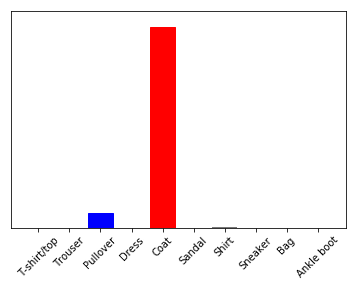

In [54]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)